# Parkisons Disease Detection using Machine Learning

In [1]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
import joblib

from IPython.display import display

In [23]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('parkinsons.csv')

In [24]:
# Exploring Dataset Content
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [25]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [26]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [27]:
# Dropping The Name Column
df.drop(['File_Name'], axis=1, inplace=True, errors='ignore')

In [28]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [29]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [30]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [31]:
df['status'] = df['status'].astype('uint8')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [33]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [34]:
# Checking For Missing Values In Dataset
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

As seen in the above step, **No Columns** of the dataset contains any Missing Values.

<Axes: xlabel='status', ylabel='count'>

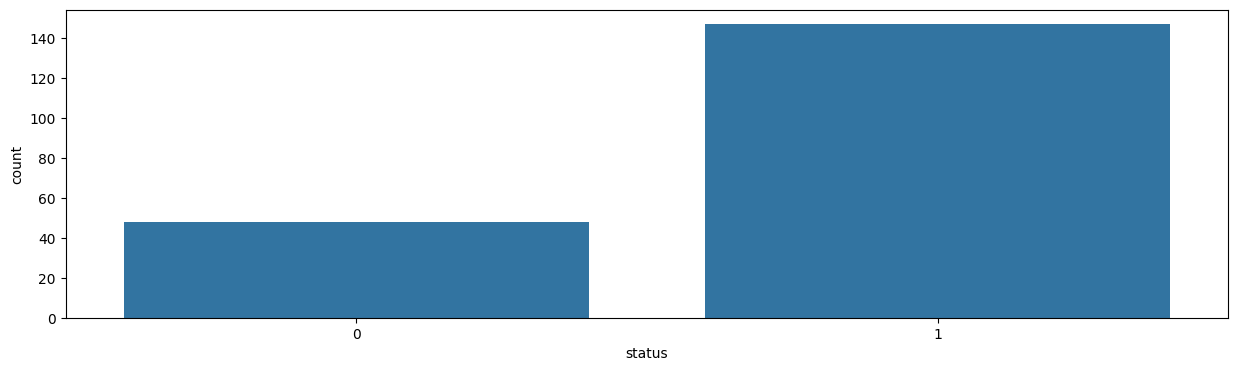

In [35]:
#Balance of Data
sns.countplot(x='status',data=df)

C:\Users\Vishwas Kumar\AppData\Local\Temp\ipykernel_16236\4151178490.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,ax=ax)


<Axes: >

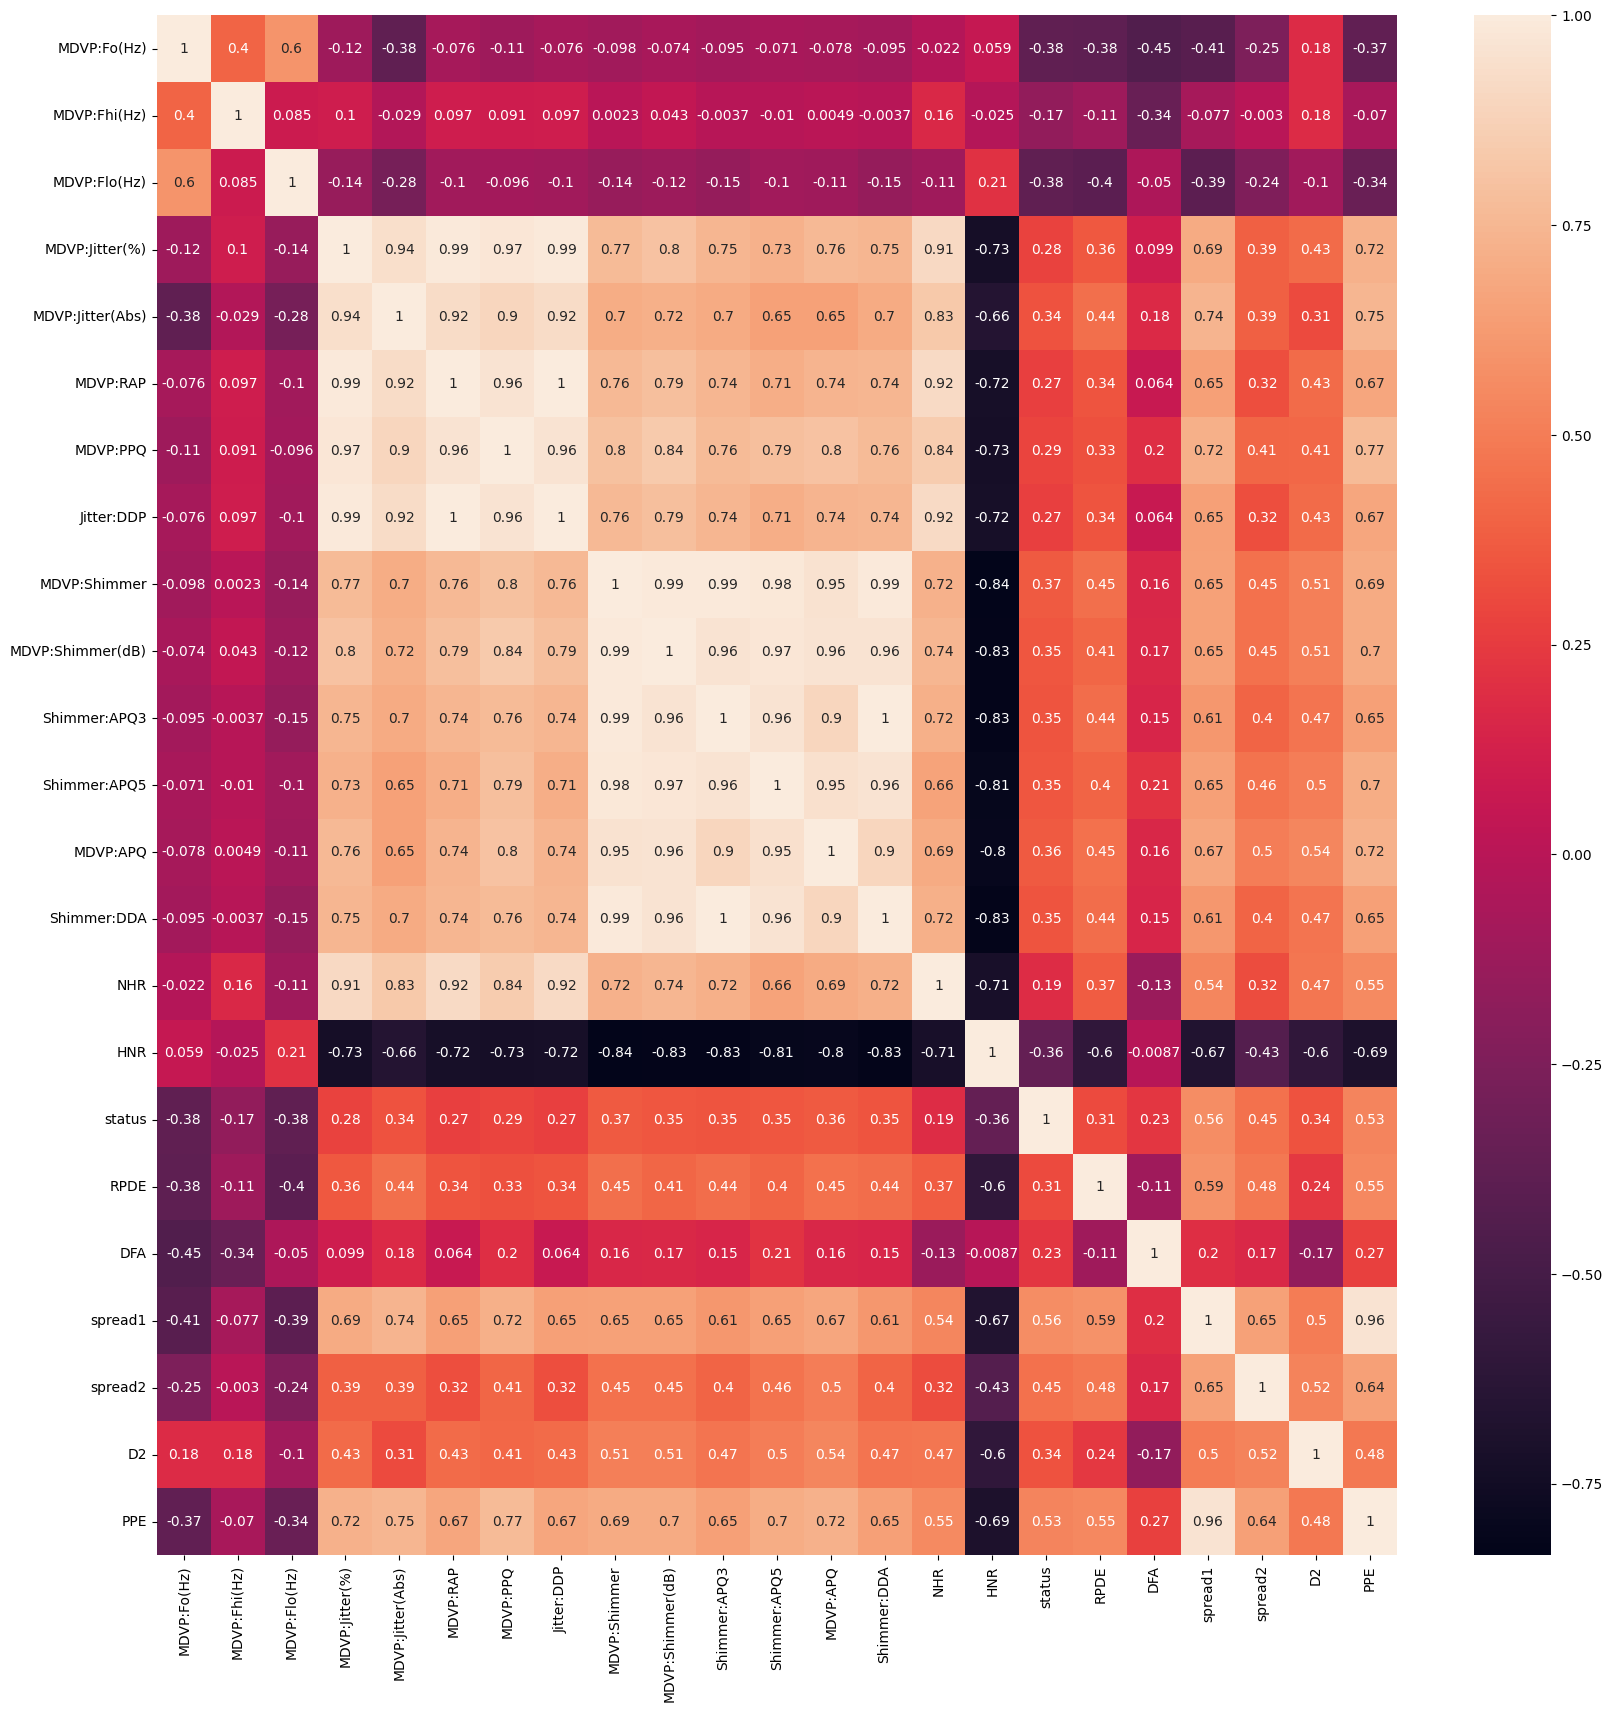

In [36]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,ax=ax)

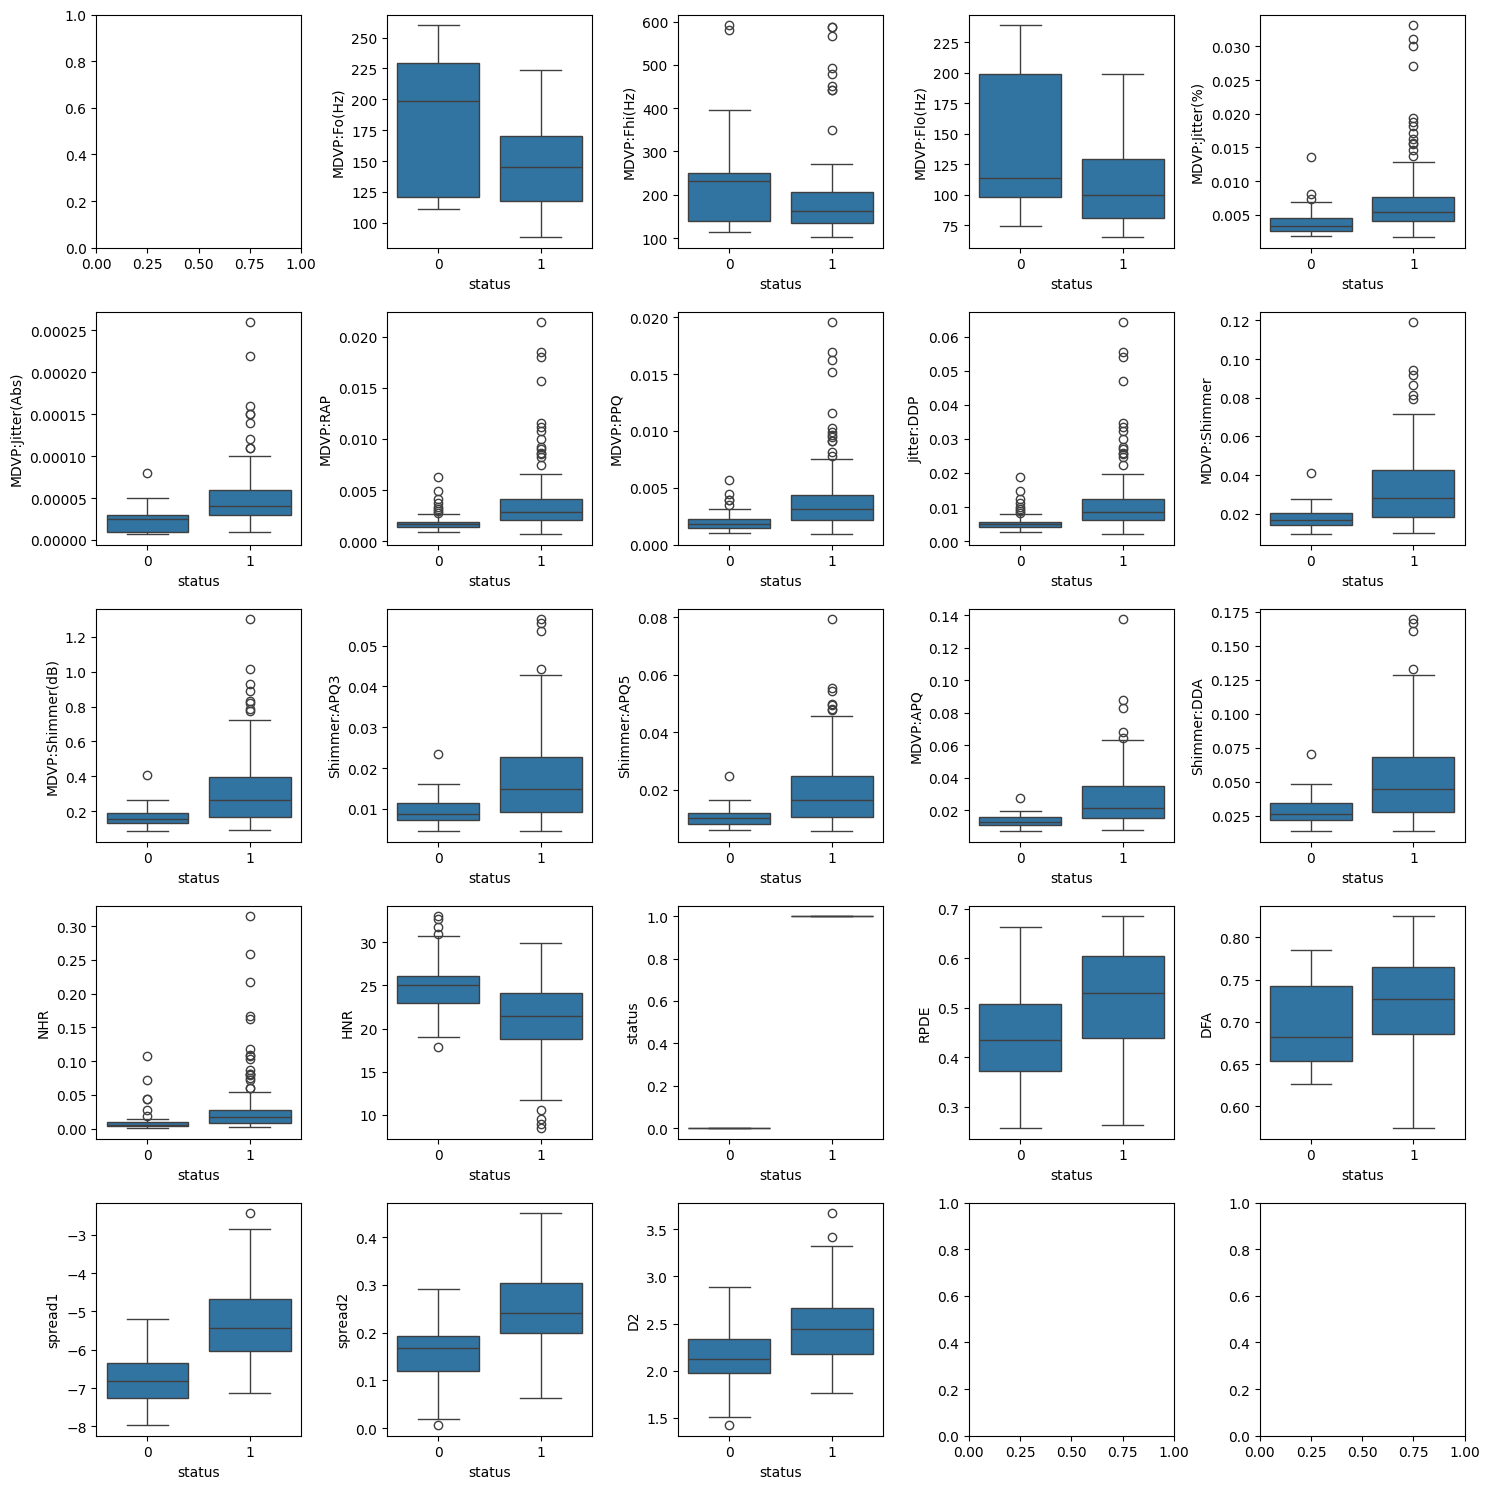

In [37]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

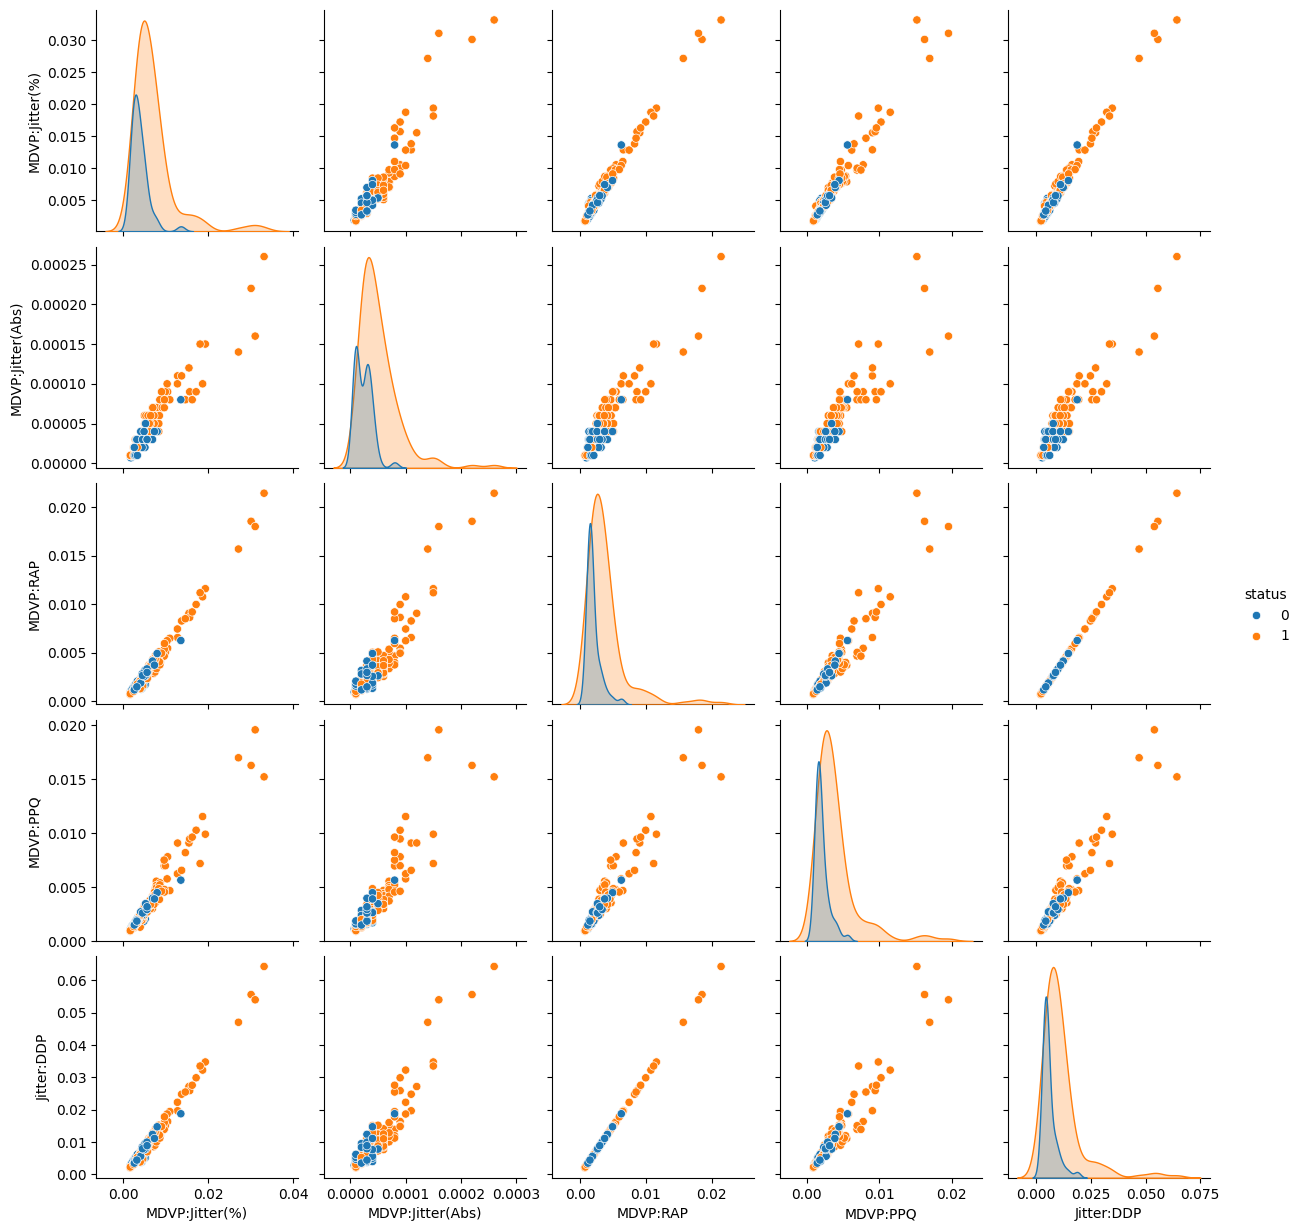

In [38]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

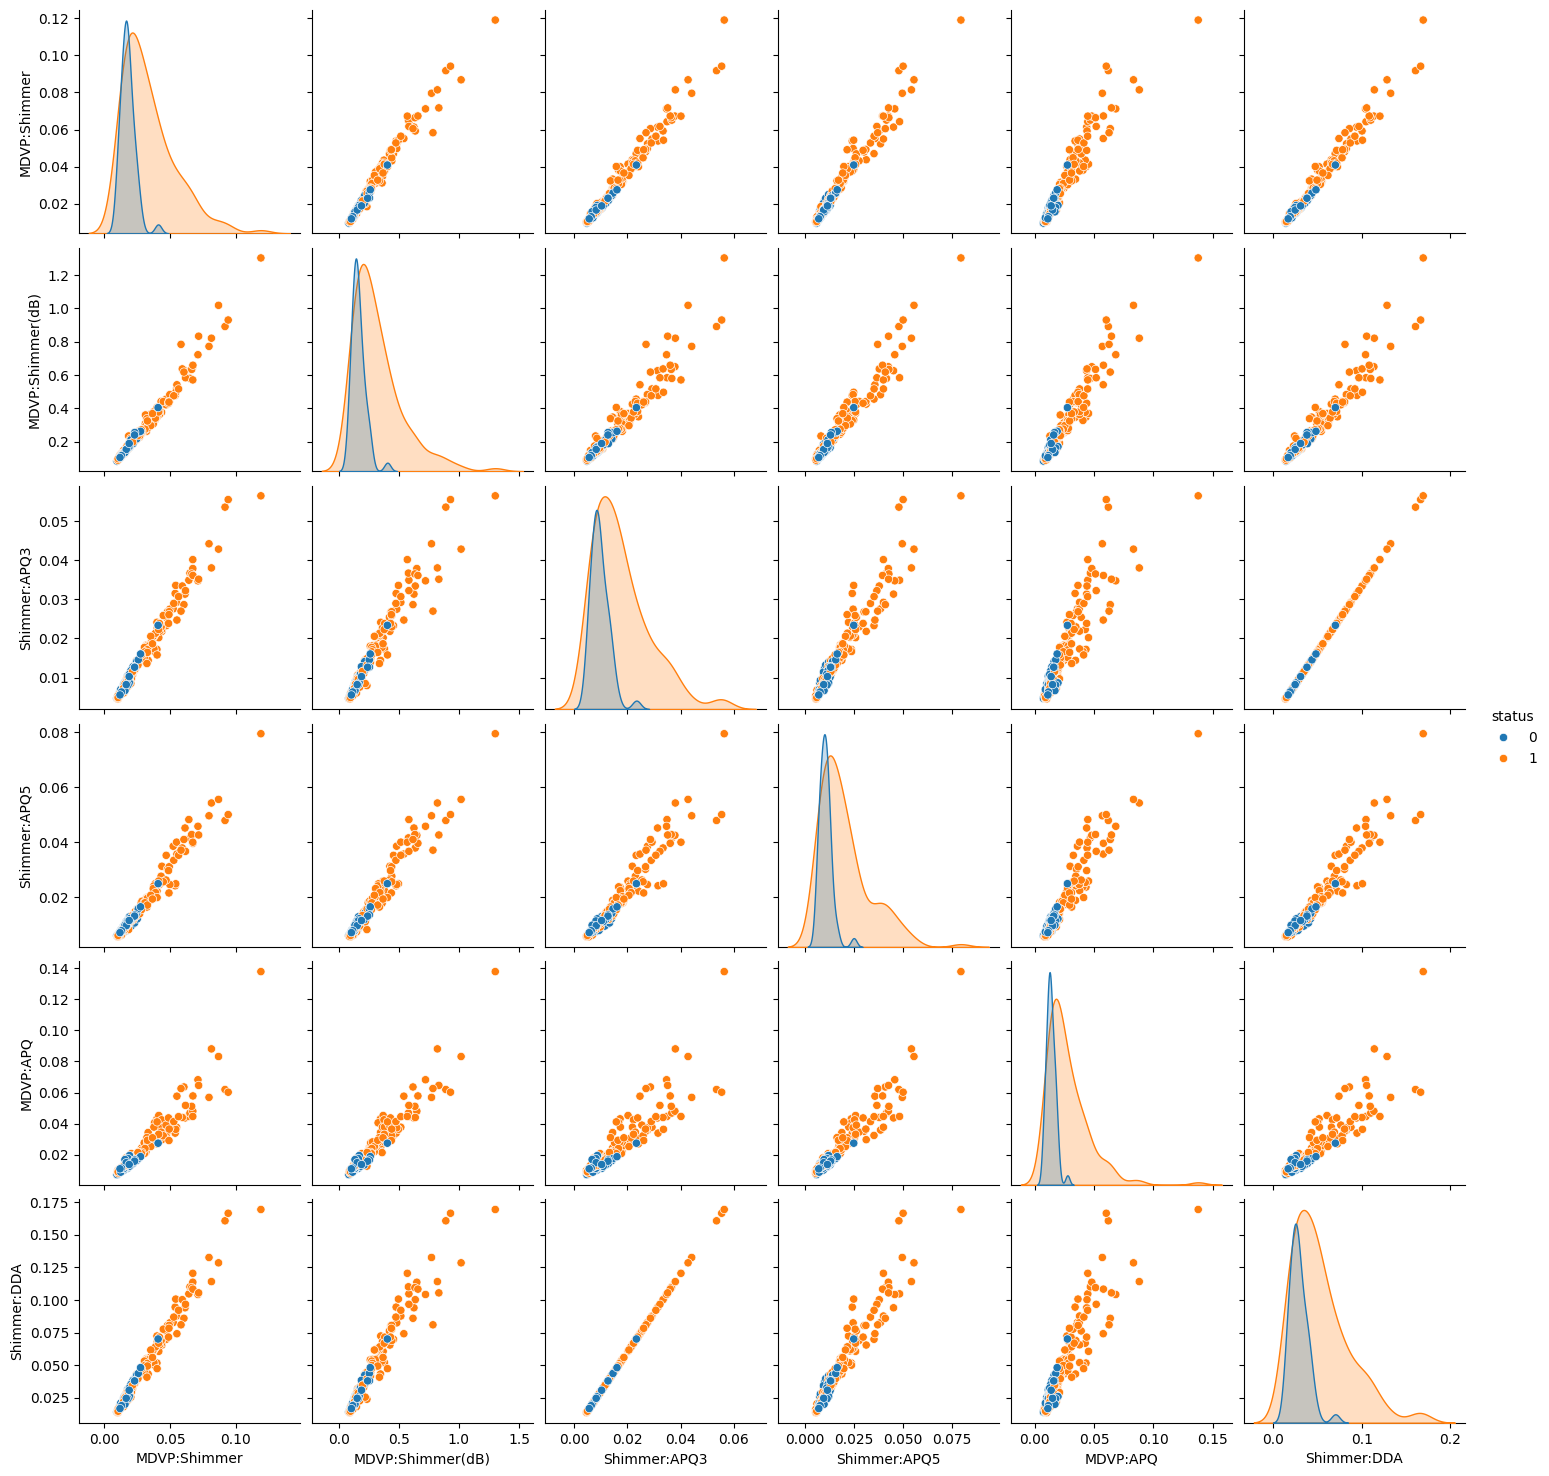

In [39]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

In [40]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [41]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 23)
Target (y) Shape Before Balancing : (195,)


In [42]:
from sklearn.preprocessing import LabelEncoder
non_numeric_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

In [43]:
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)  # Handle missing values

In [44]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)

In [45]:
# Resampling Data
X, y = sm.fit_resample(X, y)

In [46]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 23)
Target (y) Shape After Balancing : (294,)


In [47]:
# Scaling features between -1 and 1  for mormalization
scaler = MinMaxScaler((-1,1))

In [48]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [49]:

import joblib


joblib.dump(scaler, 'scaler.joblib')




['scaler.joblib']

In [50]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

# Machine Learning Model Training
In this section, we have trained the following Machine Learning Models:
+ Decision Tree Classifier
+ Random Forest Classifier
+ Logistic Regression
+ SVM
+ Naive Bayes
+ KNN Classifier
+ XGBoost Classifier

## Decision Tree Classifier

In [51]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.89      0.92      0.91        26

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



In [52]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

c:\Users\Vishwas Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vishwas Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Vishwas Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Vishwas Kumar\AppData\Local\Programs\Python\Python3

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [53]:
CV_dt.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'random_state': 90}

In [54]:
dt1=DecisionTreeClassifier(random_state=30, max_features='sqrt', max_depth=1, criterion='gini')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test)
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.74      0.77      0.75        26

    accuracy                           0.78        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.78      0.78      0.78        59



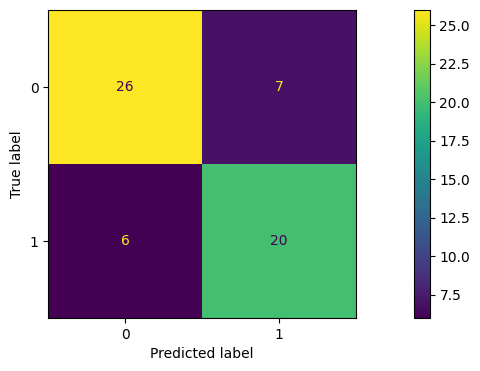

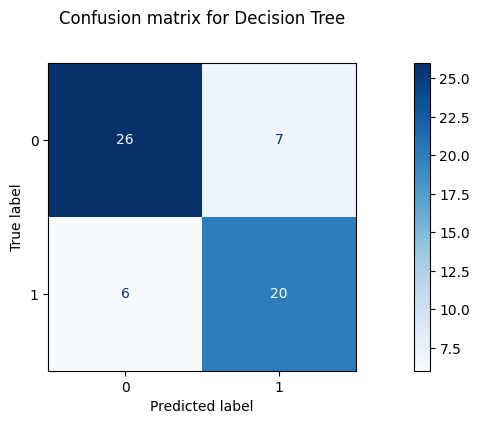

In [55]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(dt1, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.show()

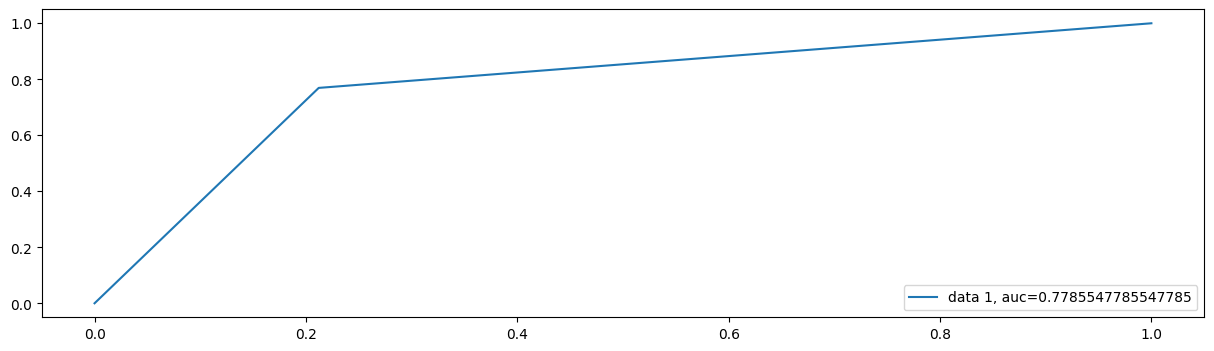

In [56]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [57]:
# Dumping Decision Tree Classifier
joblib.dump(dt1, 'dt_clf.pkl')

['dt_clf.pkl']

## Random Forest Classifier

In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.88      0.94        26

    accuracy                           0.95        59
   macro avg       0.96      0.94      0.95        59
weighted avg       0.95      0.95      0.95        59



In [59]:
param_grid = {
    'n_estimators': range(100,300,25),
    'max_features': ['sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(100,250,50),
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': range(100, 300, 25),
                         'random_state': range(100, 250, 50)})

In [60]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 125,
 'random_state': 200}

In [61]:
rfc1=RandomForestClassifier(random_state=200, max_features='sqrt', n_estimators= 125, max_depth=8, criterion='entropy')
rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.96      0.98        26

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



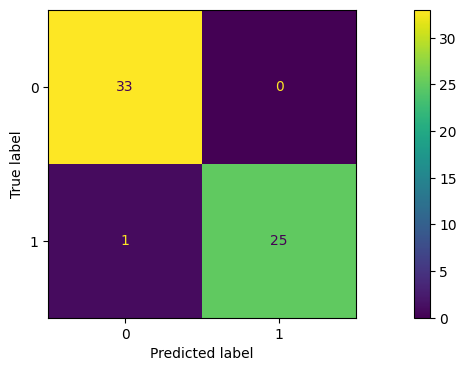

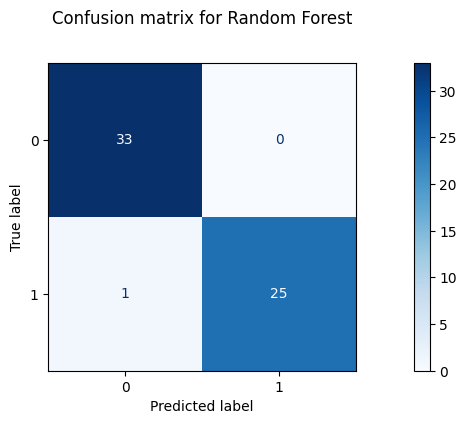

In [62]:

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(rfc1, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

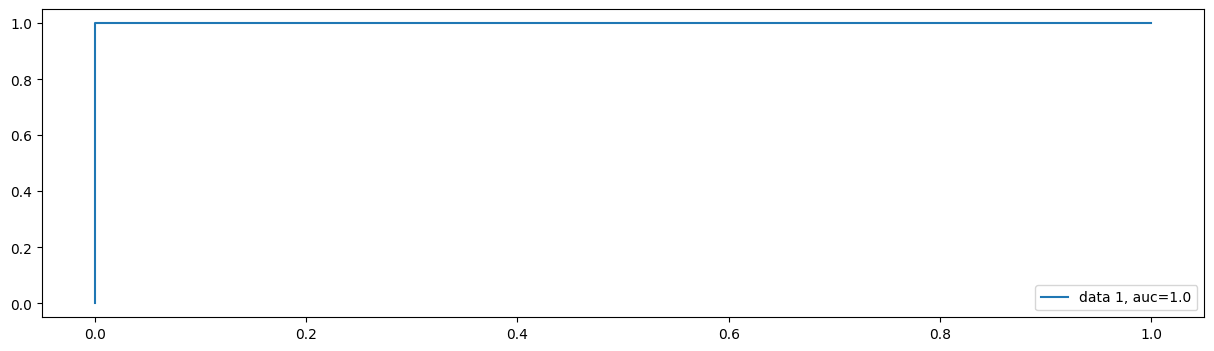

In [63]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [64]:
# Dumping Random Forest Classifier
import joblib
joblib.dump(rfc1, 'rf_clf_new.joblib')


['rf_clf_new.joblib']

## Logistic Regression

In [65]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

In [66]:
print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.91      0.77      0.83        26

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59

Confusion Matrix:


array([[31,  2],
       [ 6, 20]], dtype=int64)

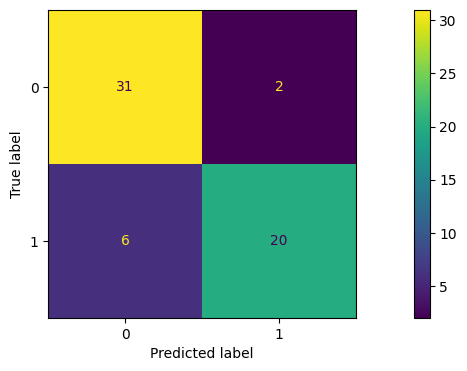

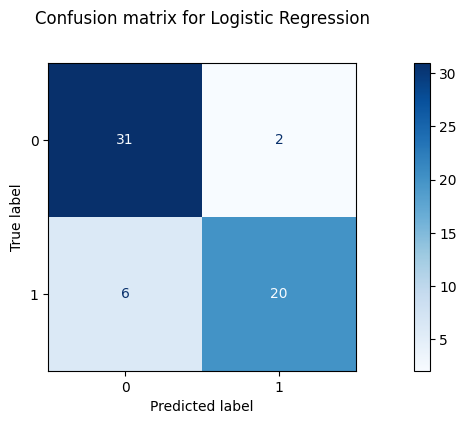

In [67]:

# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()


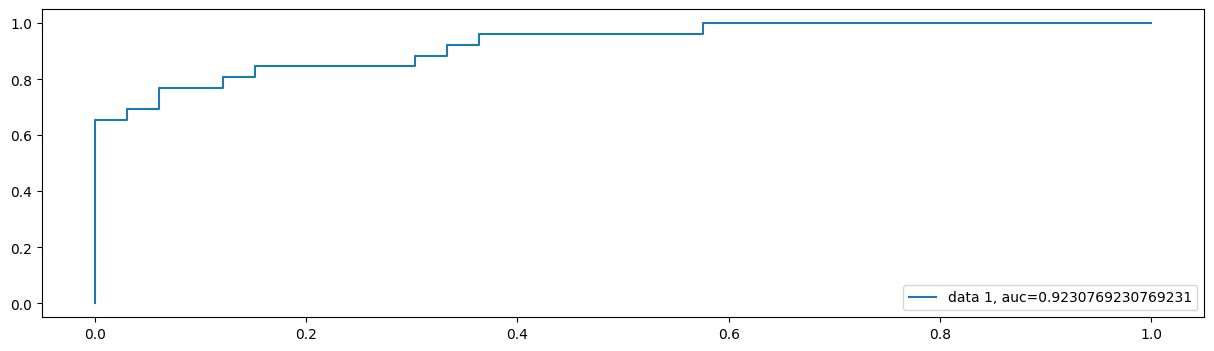

In [68]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [69]:
# Dumping Logistic Regression Model
joblib.dump(logmodel, 'lg_clf.pkl')

['lg_clf.pkl']

## SVM

SVM With Linear Kernel

In [70]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.8305084745762712
Train Set Accuracy: 0.9234042553191489


In [71]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test)

# print classification report
print("\n", classification_report(y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.826 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.769 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

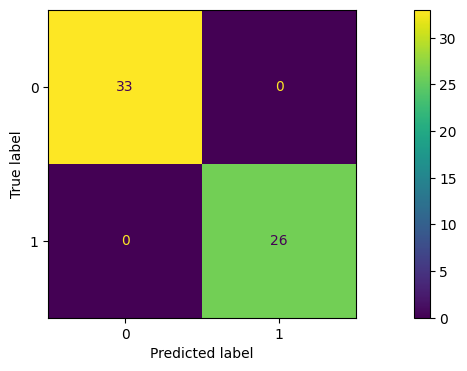

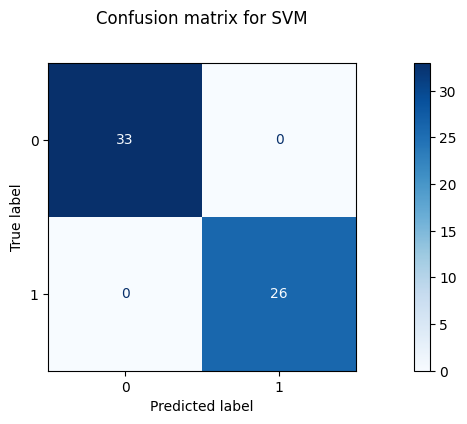

In [72]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(grid_SVC, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for SVM', y=1.1)
plt.show()


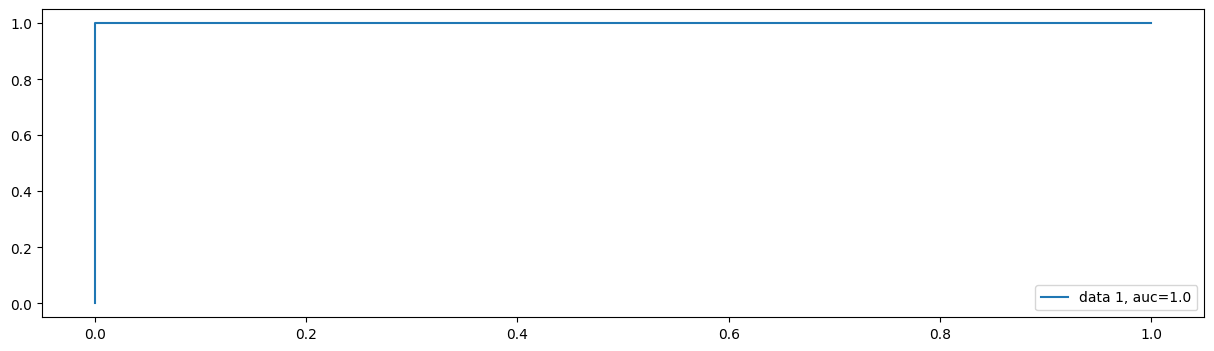

In [73]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [74]:
# Dumping SVM Classifier
joblib.dump(grid_SVC, 'svm_clf.pkl')

['svm_clf.pkl']

## Naive Bayes

In [75]:
# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        33
           1       0.93      0.50      0.65        26

    accuracy                           0.76        59
   macro avg       0.82      0.73      0.74        59
weighted avg       0.81      0.76      0.75        59



In [76]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

Confusion Matrix:


array([[32,  1],
       [13, 13]], dtype=int64)

In [77]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 76.27118644067797


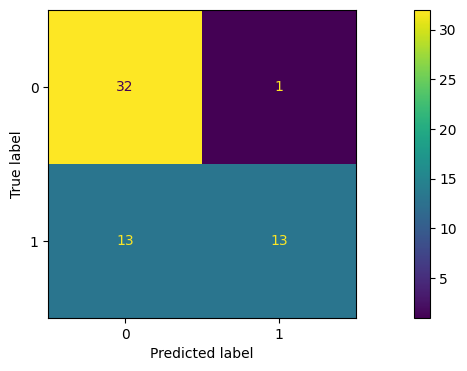

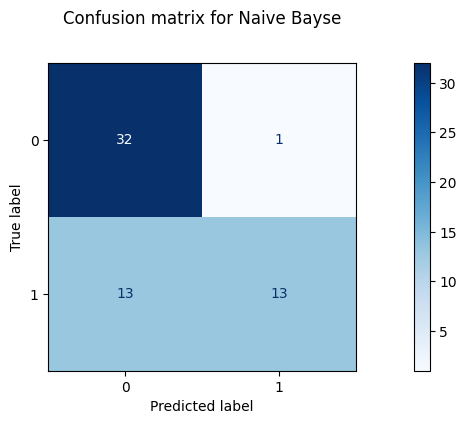

In [78]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for Naive Bayse', y=1.1)
plt.show()


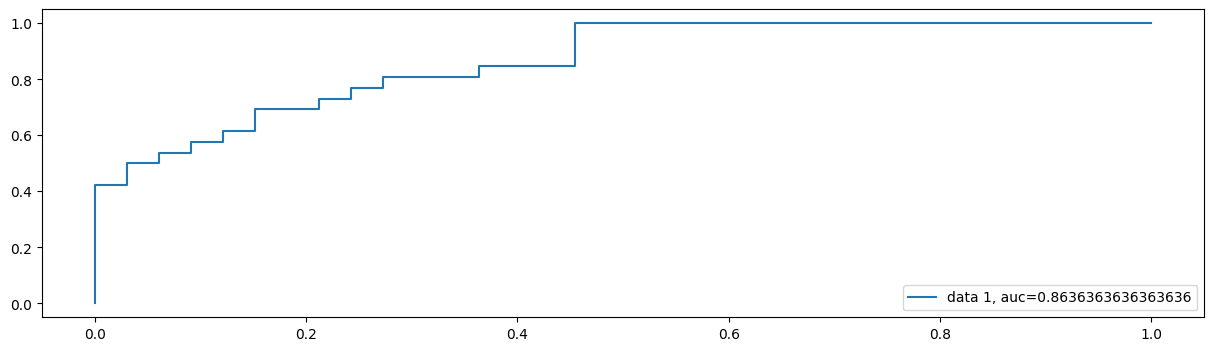

In [79]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [81]:
# Dumping Naive Bayes Classifier
joblib.dump(gnb, 'nb_clf.pkl')

['nb_clf.pkl']

## KNN Classifier


In [82]:
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = []
for n in range(2,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9830508474576272, 0.9830508474576272, 0.9661016949152542, 0.9661016949152542, 0.9491525423728814, 0.9491525423728814, 0.9322033898305084, 0.9322033898305084]


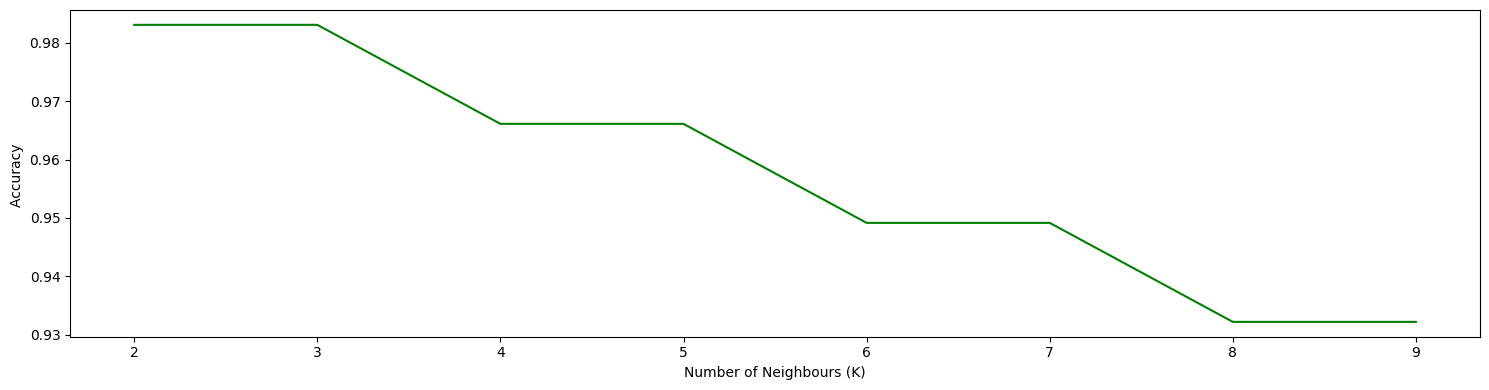

In [83]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)

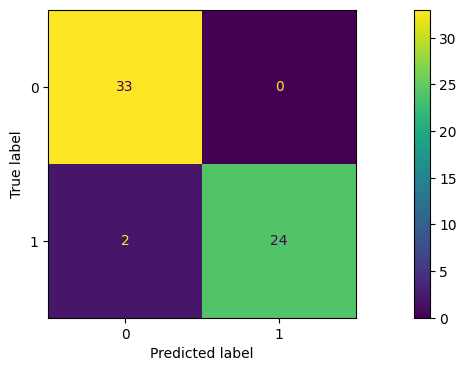

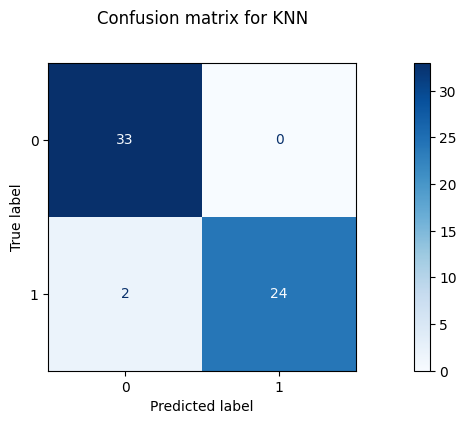

In [85]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for KNN', y=1.1)
plt.show()


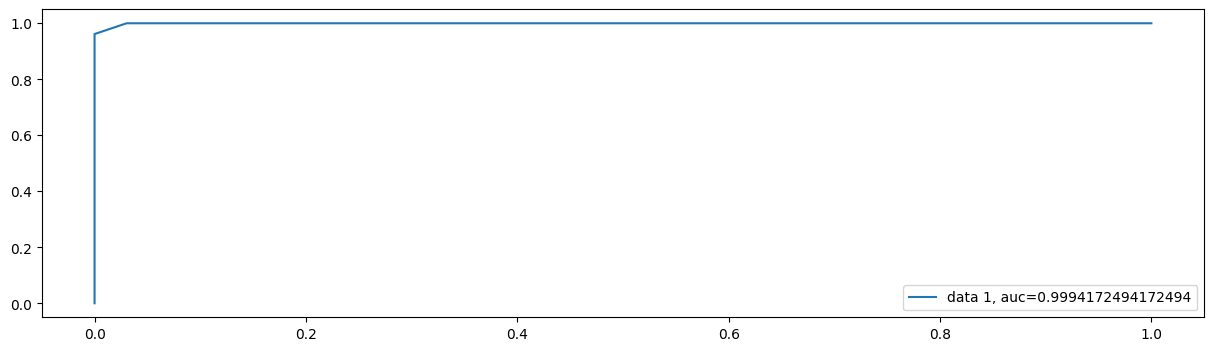

In [86]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [87]:
# Dumping KNN Classifier
joblib.dump(knn, 'knn_clf.pkl')

['knn_clf.pkl']

## XGBoost Classifer
In this section, we have trained a XGBoost Classifier, for classification of Instances to be Parkinsons or Not. The following parameters of the XGBoost Classifier have been optimized in this section:
+ **Max Depth**: This value is used to determine the Maximum Depth of the Tree.
+ **ETA** : This is also known as Learning Rate.
+ **Reg_Lambda** : This is the L2 Regularization for the weights.
+ **Random State** : This is used to evaluate and determine the performance of the model based on different random states.

The *Parameter Optimization* has been performed using **GridSearchCV** with the following parameters:
+ **Scoring Parameter**: F1 Score
+ **Cross Validation**: 3

In [88]:
# Defining Parameter Dictionary
param_dict = {'max_depth': range(4,8), 'eta' : [0.1, 0.2, 0.3, 0.4, 0.5],
              'reg_lambda' : [0.8, 0.9, 1, 1.1, 1.2],
              'random_state': [300, 600, 900]}

In [89]:
clf = GridSearchCV(XGBClassifier(), param_grid = param_dict,
                   scoring = 'f1', cv = 3, verbose = 1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(4, 8),
                         'random_state': [300, 600, 900],
                         'reg_lambda': [0.8, 0.9, 1, 1.1, 1.2]},
             scoring='f1', verbose=1)

In [90]:
print('Best Score :', clf.best_score_)
print('Best Parameters :', clf.best_params_)

Best Score : 0.9783409140134287
Best Parameters : {'eta': 0.3, 'max_depth': 6, 'random_state': 300, 'reg_lambda': 1.1}


In [91]:
# Extracting Best Classifier From GridSearchCV
xgb_clf = clf.best_estimator_

In [92]:
# Evaluating Performance on Train Set
pred = xgb_clf.predict(X_train)
print('For Train Set')
print('Accuracy :', metrics.accuracy_score(y_train, pred))
print('Precision :', metrics.precision_score(y_train, pred))
print('Recall :', metrics.recall_score(y_train, pred))
print('R2 Score :', metrics.r2_score(y_train, pred))

For Train Set
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
R2 Score : 1.0


In [94]:
# Evaluating Performance on Train Set
# Evaluating Performance on Train Set
predXGB = xgb_clf.predict(X_test)
print('For Test Set')
print('Accuracy :', metrics.accuracy_score(y_test, predXGB))
print('Precision :', metrics.precision_score(y_test, predXGB))
print('Recall :', metrics.recall_score(y_test, predXGB))
print('R2 Score :', metrics.r2_score(y_test, predXGB))

For Test Set
Accuracy : 0.9491525423728814
Precision : 0.96
Recall : 0.9230769230769231
R2 Score : 0.7937062937062938


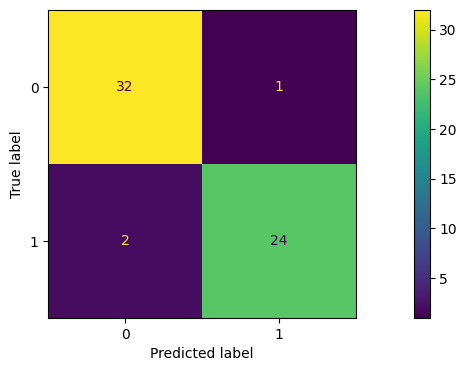

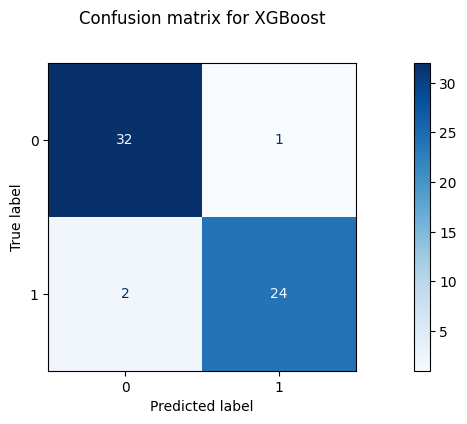

In [95]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test)

# Plot the confusion matrix with the desired colormap
cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion matrix for XGBoost', y=1.1)
plt.show()


In [96]:
# Dumping XGBoost Classifier
joblib.dump(xgb_clf, 'xgb_clf.pkl')

['xgb_clf.pkl']

In [97]:
import joblib
joblib.dump(xgb_clf, 'xgb_clf_new.joblib')

['xgb_clf_new.joblib']

# Comparision Table

In [98]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
        'XGB':[accuracy_score(y_test, predXGB), f1_score(y_test, predXGB), recall_score(y_test, predXGB), precision_score(y_test, predXGB), r2_score(y_test, predXGB)]
}
chart = pd.DataFrame(chart)

In [99]:
display(chart)

,Metric,DT,RF,LR,SVM,NB,KNN,XGB
0,Accuracy,0.779661,0.983051,0.864407,1.0,0.762712,0.966102,0.949153
1,F1-Score,0.754717,0.980392,0.833333,1.0,0.650000,0.960000,0.941176
2,Recall,0.769231,0.961538,0.769231,1.0,0.500000,0.923077,0.923077
3,Precision,0.740741,1.000000,0.909091,1.0,0.928571,1.000000,0.960000
4,R2-Score,0.106061,0.931235,0.449883,1.0,0.037296,0.862471,0.793706
